<div>
Olá, Suiane!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto possui alguns pontos bem interessantes, dos quais eu destaco:
    
- Código bem simples e estruturado 
- Comentários sucintos e bem objetivos
- Análises bem detalhadas em cada etapa do projeto
- Boas habilidades de manipulação de dados
    
<br>
Espero que as sugestões sejam relevantes para projetos futuros. Te desejo uma jornada de muito sucesso e aprendizado. 
        
<br>   
    
Qualquer dúvida, pode contar comigo.   
    
<br>  
    
**Até breve!**

</div>

**Passo 1. Abra o arquivo de dados e leia a informação geral**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

In [2]:
df=pd.read_csv('/datasets/logs_exp_us.csv', sep="\t")

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O conjunto de dados foi carregado corretamente
- O import das bibliotecas foi feito de forma correta e em uma célula separada
</div>

**Passo 2. Prepare os dados para análise**

In [3]:
df=df.rename(columns={
    "EventName":"Event",
    "DeviceIDHash":"UserID",
    "EventTimestamp":"Time"
})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Event   244126 non-null  object
 1   UserID  244126 non-null  int64 
 2   Time    244126 non-null  int64 
 3   ExpId   244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [5]:
df["Date"] = pd.to_datetime(df["Time"], unit="s")
df['Day']=pd.to_datetime(df['Date']).dt.date

In [6]:
df.head(5)

,Event,UserID,Time,ExpId,Date,Day
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


**Passo 3. Estude e verifique os dados**

*Quantos eventos ficam nos registros?*

In [7]:
df.shape[0]

244126

*Quantos usuários ficam nos registros?*

In [8]:
df['UserID'].nunique()

7551

*Qual é o número médio de eventos por usuário?*

In [9]:
df.groupby('UserID').size().mean()

32.33028737915508

*Qual é o período de tempo que os dados cobrem? Encontre as datas máxima e mínima. Desenhe um histograma por data e hora. Você pode ter certeza de que possui os dados igualmente completos para todo o período? Os eventos mais antigos podem acabar aparecendo nos diários de alguns usuários por motivos técnicos, e isso pode distorcer o quadro geral. Encontre o momento em que os dados começam a ser completos e ignore a seção anterior. Qual período os dados realmente representam?*

In [10]:
df['Date'].min()

Timestamp('2019-07-25 04:43:36')

In [11]:
df['Date'].max()

Timestamp('2019-08-07 21:15:17')

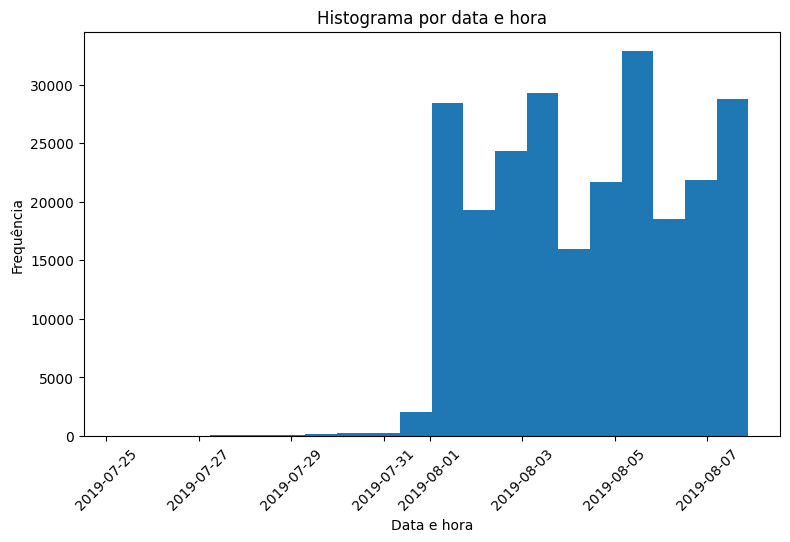

In [31]:
plt.figure(figsize=(8,5))
plt.hist(df["Date"], bins=20)
plt.xlabel("Data e hora")
plt.ylabel("Frequência")
plt.title("Histograma por data e hora")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
  
As estatísticas dos usuários foram analisadas. Bom trabalho plotando o gráfico acima!
</div>

In [13]:
df

,Event,UserID,Time,ExpId,Date,Day
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


In [14]:
df_after=df[df['Date']>='2019-08-01 00:00:00']

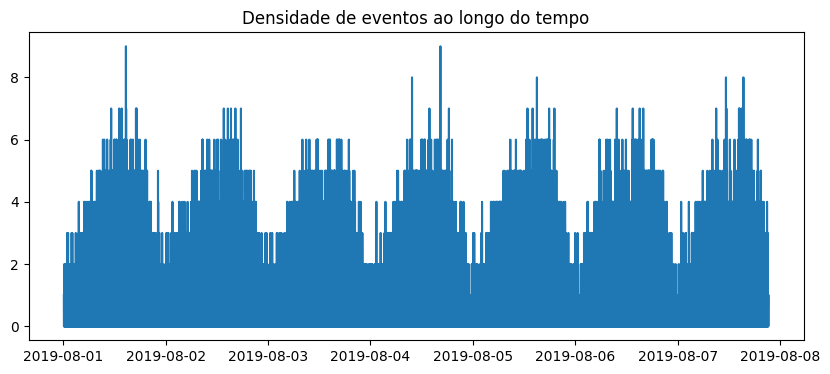

Início real dos dados: 2019-08-01 00:07:28
Fim real dos dados: 2019-08-07 21:15:17


In [15]:
counts = df_after.set_index("Date").resample("S").size()

plt.figure(figsize=(10,4))
plt.plot(counts)
plt.title("Densidade de eventos ao longo do tempo")
plt.show()

real_end = df_after["Date"].max()

print("Início real dos dados:", df_after['Date'].min())
print("Fim real dos dados:", real_end)

In [16]:
stable_start=df_after['Date'].min()
df_before = df[df["Date"] < stable_start]
df_after  = df[df["Date"] >= stable_start]

eventos_antes = len(df_before)
usuarios_antes = df_before["UserID"].nunique()

eventos_depois = len(df_after)
usuarios_depois = df_after["UserID"].nunique()

pct_eventos_perdidos = eventos_antes / (eventos_antes + eventos_depois)
pct_usuarios_perdidos = usuarios_antes / (usuarios_antes + usuarios_depois)

df_filtrado = df[df["Date"] >= stable_start]

*Você perdeu muitos eventos e usuários ao excluir os dados mais antigos?*

In [17]:
print("Eventos antes do período estável:", eventos_antes)
print("Usuários antes do período estável:", usuarios_antes)
print("Percentual de eventos descartados:", pct_eventos_perdidos)
print("Percentual de usuários descartados:", pct_usuarios_perdidos)

Eventos antes do período estável: 2828
Usuários antes do período estável: 1451
Percentual de eventos descartados: 0.011584181938834865
Percentual de usuários descartados: 0.16149137451307735


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- A quantidade de eventos descartados após o filtro foi analisada corretamente. Bom trabalho calculando o percentual de perda de usuários!
</div>

*Certifique-se de ter usuários de todos os três grupos experimentais.*

In [18]:
df_filtrado['ExpId'].nunique()

3

**Passo 4. Estude o funil de eventos**

*Veja quais eventos estão nos diários e sua frequência de ocorrência. Classifique-os por frequência.*

In [19]:
freq_eventos = df_filtrado["Event"].value_counts()
freq_eventos

MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: Event, dtype: int64

*Encontre o número de usuários que executaram cada uma dessas ações. Ordene os eventos pelo número de usuários. Calcule a proporção de usuários que executaram a ação pelo menos uma vez.*

In [20]:
usuarios_por_evento = df_filtrado.groupby("Event")["UserID"].nunique()
usuarios_por_evento

Event
CartScreenAppear           3734
MainScreenAppear           7419
OffersScreenAppear         4593
PaymentScreenSuccessful    3539
Tutorial                    840
Name: UserID, dtype: int64

In [21]:
usuarios_por_evento_ordenado = usuarios_por_evento.sort_values(ascending=False)
usuarios_por_evento_ordenado

Event
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Tutorial                    840
Name: UserID, dtype: int64

In [30]:
total_usuarios = df_filtrado["UserID"].nunique()
proporcao = usuarios_por_evento_ordenado / total_usuarios
proporcao

Event
MainScreenAppear           0.984736
OffersScreenAppear         0.609636
CartScreenAppear           0.495620
PaymentScreenSuccessful    0.469737
Tutorial                   0.111495
Name: UserID, dtype: float64

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- A proporção de usuários por etapa do funil foi analisada
- A ordem das etapas foi calculada!
</div>

*Em que ordem você acha que as ações ocorreram? Todos elas fazem parte de uma única sequência? Você não precisa levá-las em consideração ao calcular o funil.*

MainScreenAppear, OffersScreenAppear, CartScreenAppear, PaymentScreenSuccessful e Tutorial. São uma sequência mas acredito que a etapa Tutorial seja opcional.

*Use o funil de eventos para encontrar a parcela de usuários que passam de uma etapa para a próxima (por exemplo, para a sequência de eventos A → B → C, calcule a proporção de usuários na etapa B para o número de usuários na etapa A e a proporção de usuários na etapa C para o número na etapa B).*

In [23]:
df_filtrado = df_filtrado.reset_index(drop=True)
funil=['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Tutorial']

usuarios_etapa = {
    etapa: df_filtrado.loc[df_filtrado["Event"] == etapa, "UserID"].nunique()
    for etapa in funil
}

proporcoes = {}

for i in range(1, len(funil)):
    etapa_atual = funil[i]
    etapa_anterior = funil[i-1]
    
    proporcoes[f"{etapa_anterior}→{etapa_atual}"] = (
        usuarios_etapa[etapa_atual] / usuarios_etapa[etapa_anterior]
    )

print("Usuários por etapa:")
print(usuarios_etapa)
print("\nProporções entre etapas:")
print(proporcoes)

Usuários por etapa:
{'MainScreenAppear': 7419, 'OffersScreenAppear': 4593, 'CartScreenAppear': 3734, 'PaymentScreenSuccessful': 3539, 'Tutorial': 840}

Proporções entre etapas:
{'MainScreenAppear→OffersScreenAppear': 0.6190861302062273, 'OffersScreenAppear→CartScreenAppear': 0.8129762682342695, 'CartScreenAppear→PaymentScreenSuccessful': 0.9477771826459561, 'PaymentScreenSuccessful→Tutorial': 0.23735518508053122}


*Em qual fase você perde mais usuários?*

Na fase PaymentScreenSuccessful→Tutorial com proporção de 23% apenas de usuários que vão para a etapa Tutorial após o pagamento.

*Qual é a parcela de usuários que faz o caminho inteiro, desde o primeiro evento até o pagamento?*

In [24]:
usuarios_por_evento = {
    etapa: set(df_filtrado.loc[df_filtrado["Event"] == etapa, "UserID"])
    for etapa in funil
}

usuarios_full_path = set.intersection(*usuarios_por_evento.values())

total_usuarios = df_filtrado["UserID"].nunique()
proporcao_full_path = len(usuarios_full_path) / total_usuarios

print("Usuários que fizeram o caminho inteiro:", len(usuarios_full_path))
print("Proporção:", proporcao_full_path)

Usuários que fizeram o caminho inteiro: 466
Proporção: 0.06185293336872843


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- A conversão dos usuários por etapa do funil foi analisada
- O percentual de usuários que percorrem todo o caminho foi calculado
- O número de usuários por grupo foi analisado
</div>

**Passo 5. Estude os resultados do experimento**

*Quantos usuários há em cada grupo?*

In [25]:
usuarios_por_grupo=df_filtrado.groupby('ExpId')['UserID'].nunique()
usuarios_por_grupo

ExpId
246    2484
247    2513
248    2537
Name: UserID, dtype: int64

*Temos dois grupos de controle no teste A/A, no qual verificamos nossos mecanismos e cálculos. Veja se há uma diferença estatisticamente significativa entre as amostragens 246 e 247.*

In [26]:
usuarios_evento_grupo=df_filtrado.groupby(['ExpId','Event'])['UserID'].nunique().unstack()
usuarios_evento_grupo

Event,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
ExpId,,,,,
246,1266,2450,1542,1200,278
247,1238,2476,1520,1158,283
248,1230,2493,1531,1181,279


In [27]:
evento_popular=usuarios_evento_grupo.sum().idxmax()
usuarios_por_grupo_popular=usuarios_evento_grupo[evento_popular]

proporcoes=usuarios_por_grupo_popular/usuarios_por_grupo
contagens=usuarios_por_grupo_popular.loc[[246,247]]
totais=usuarios_por_grupo.loc[[246,247]]

stat, pvalue= proportions_ztest(contagens,totais)
print("Pvalue:",pvalue)
alpha=0.05

if alpha < pvalue:
    print("Não podemos rejeitar a hipótese nula")
else:
    print("Podemos rejeitar a hipótese nula")

Pvalue: 0.7570597232046099
Não podemos rejeitar a hipótese nula


*Selecione o evento mais popular. Em cada um dos grupos de controle, encontre o número de usuários que realizaram essa ação. Encontre a proporção deles. Verifique se a diferença entre os grupos é estatisticamente significativa. Repita o procedimento para todos os outros eventos (economizará tempo se você criar uma função especial para este teste). Você pode confirmar se os grupos foram divididos corretamente?*

In [28]:
evento_popular=usuarios_evento_grupo.sum().idxmax()
usuarios_por_grupo_popular=usuarios_evento_grupo[evento_popular]

proporcoes=usuarios_por_grupo_popular/usuarios_por_grupo
contagens=usuarios_por_grupo_popular.loc[[246,248]]
totais=usuarios_por_grupo.loc[[246,248]]

stat, pvalue= proportions_ztest(contagens,totais)
print("Pvalue:",pvalue)
alpha=0.05

if alpha < pvalue:
    print("Não podemos rejeitar a hipótese nula")
else:
    print("Podemos rejeitar a hipótese nula")

Pvalue: 0.2949721933554553
Não podemos rejeitar a hipótese nula


Sim, os grupos parecem ter sido divididos corretamente. Não foi detectada nenhuma diferença estatisticamente significativa entre os grupos no evento mais popular (p-value = 0.29). Isso indica que a divisão foi aleatória e não há sinais de viés na alocação dos usuários.

*Faça a mesma coisa para o grupo com fontes alteradas. Compare os resultados com os de cada um dos grupos de controle para cada evento isoladamente. Compare os resultados com os resultados combinados para os grupos de controle. Quais conclusões você pode tirar do experimento?*

In [29]:
evento_popular=usuarios_evento_grupo.sum().idxmax()
usuarios_por_grupo_popular=usuarios_evento_grupo[evento_popular]

proporcoes=usuarios_por_grupo_popular/usuarios_por_grupo
contagens=usuarios_por_grupo_popular.loc[[247,248]]
totais=usuarios_por_grupo.loc[[247,248]]

stat, pvalue= proportions_ztest(contagens,totais)
print("Pvalue:",pvalue)
alpha=0.05

if alpha < pvalue:
    print("Não podemos rejeitar a hipótese nula")
else:
    print("Podemos rejeitar a hipótese nula")

Pvalue: 0.45870536166215137
Não podemos rejeitar a hipótese nula


O teste para o grupo com fontes alteradas também não mostrou diferença estatisticamente significativa em relação aos grupos de controle (p-value ≈ 0.46). Isso indica que a alteração da fonte não modificou o comportamento dos usuários no evento analisado. Os usuários do tratamento se comportam essencialmente igual aos usuários dos controles.

*Qual nível de significância você definiu para testar as hipóteses estatísticas mencionadas acima? Calcule quantos testes de hipóteses estatísticas você realizou. Com um nível de significância estatística de 0,1, um de cada 10 resultados pode ser falso. Qual deveria ser o nível de significância? Se você quiser alterá-lo, execute as etapas anteriores novamente e verifique suas conclusões.*

Usei α = 0,05 como nível de significância. Ao todo, realizei 3 testes de hipóteses (contagem conforme estrutura dos eventos). Considerando testes múltiplos, um α menor poderia ser adotado, como 0,01 ou uma correção de Bonferroni. No entanto, todos os p-values observados ficaram muito acima desses thresholds, de modo que as conclusões permanecem as mesmas mesmo após ajustes: não há evidências de diferença estatisticamente significativa entre os grupos.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O teste foi executado corretamente
- As estatísticas e `p-valor` foram calculados
</div>